# Homicide Rate Prediction
Data Squad

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import Imputer
from sklearn import preprocessing

## Load dataset

In [2]:
primary = pd.read_csv('FinalDataset.csv')
primary.head()

,Entity,Code,Year,Cost of closing the poverty gap in int-$ 2011 (PovcalNet (World Bank) (2017)) ($),Public health expenditure share GDP OWID(%),"Deaths - Protein-energy malnutrition - Sex: Both - Age: Age-standardized (Rate) (deaths per 100,000 individuals)",Infant mortality rate (%),GDP per capita (int.-$) (constant 2011 international $),annual health care per capita(constant 2011 international $),"Deaths - Interpersonal violence - Sex: Both - Age: All Ages (Rate) (homicides per 100,000)"
0,Afghanistan,AFG,2012.0,NaN,2.920566,3.390730,6.09,1839.273579,160.368027,11.445933
1,Albania,ALB,2012.0,4424530.0,2.735704,0.167334,0.95,10369.823380,544.006172,2.481095
2,Algeria,DZA,2012.0,NaN,4.520251,0.298914,2.24,13161.961670,821.338885,1.229986
3,American Samoa,ASM,2012.0,NaN,NaN,5.616784,NaN,NaN,NaN,5.083770
4,Andean Latin America,NaN,2012.0,NaN,NaN,3.822898,NaN,NaN,NaN,8.303727


In [3]:
# women = pd.read_csv('wbl1971_2020.csv')
# women.columns = women.iloc[0]
# women = women.drop([0])
# women.head()

## Data cleaning

In [4]:
primary.columns = ['Country', 'Code', 'Year', 'PovertyGap', 'PercentHealthExpenditure', 
                  'MalnutritionDeaths', 'InfantMortalityRate', 'GDPPerCapita', 
                  'HealthCarePerCapita', 'HomicideRate']
primary

,Country,Code,Year,PovertyGap,PercentHealthExpenditure,MalnutritionDeaths,InfantMortalityRate,GDPPerCapita,HealthCarePerCapita,HomicideRate
0,Afghanistan,AFG,2012.0,NaN,2.920566,3.390730,6.09,1839.273579,160.368027,11.445933
1,Albania,ALB,2012.0,4.424530e+06,2.735704,0.167334,0.95,10369.823380,544.006172,2.481095
2,Algeria,DZA,2012.0,NaN,4.520251,0.298914,2.24,13161.961670,821.338885,1.229986
3,American Samoa,ASM,2012.0,NaN,NaN,5.616784,NaN,NaN,NaN,5.083770
4,Andean Latin America,NaN,2012.0,NaN,NaN,3.822898,NaN,NaN,NaN,8.303727
...,...,...,...,...,...,...,...,...,...,...
276,Western Sub-Saharan Africa,NaN,2012.0,NaN,NaN,13.773019,NaN,NaN,NaN,4.648307
277,World,OWID_WRL,2012.0,1.805140e+11,NaN,4.110111,3.45,13838.011980,1179.840791,5.658716
278,Yemen,YEM,2012.0,NaN,1.571628,2.472157,4.32,3793.412118,210.641309,3.060375
279,Zambia,ZMB,2012.0,3.019621e+09,2.536370,21.404929,4.96,3509.413319,175.092575,6.202861


In [5]:
primary.describe()

,Year,PovertyGap,PercentHealthExpenditure,MalnutritionDeaths,InfantMortalityRate,GDPPerCapita,HealthCarePerCapita,HomicideRate
count,280.0,1.320000e+02,192.000000,231.000000,239.000000,236.000000,236.000000,231.000000
mean,2012.0,2.700805e+09,4.061001,5.388130,2.664959,17317.884932,1216.142527,7.963268
std,0.0,1.615221e+10,2.432823,8.646644,2.250760,19326.730018,1540.664262,12.483881
min,2012.0,0.000000e+00,0.792246,0.010208,0.190000,706.797964,24.552872,0.504217
25%,2012.0,6.198330e+06,2.211426,0.195950,0.820000,4126.883699,191.687787,1.714383
50%,2012.0,5.460272e+07,3.398974,1.612919,1.790000,10996.211780,684.437490,4.072165
75%,2012.0,1.168079e+09,5.335460,6.863823,4.215000,22730.831110,1420.090005,8.157472
max,2012.0,1.805140e+11,13.906522,66.011036,9.980000,125302.080000,8789.767513,102.742835


In [6]:
primary = primary[ primary['Code'].str.len() == 3 ]
primary.isna().sum()

Country                      0
Code                         0
Year                         0
PovertyGap                  75
PercentHealthExpenditure    14
MalnutritionDeaths          10
InfantMortalityRate         13
GDPPerCapita                16
HealthCarePerCapita         15
HomicideRate                10
dtype: int64

In [7]:
# Imputing missing values

primary['PovertyGap'].fillna(primary['PovertyGap'].median(), inplace=True)
primary['PercentHealthExpenditure'].fillna(primary['PercentHealthExpenditure'].median(), inplace=True)
primary['MalnutritionDeaths'].fillna(primary['MalnutritionDeaths'].median(), inplace=True)
primary['InfantMortalityRate'].fillna(primary['InfantMortalityRate'].median(), inplace=True)
primary['GDPPerCapita'].fillna(primary['GDPPerCapita'].median(), inplace=True)
primary['HealthCarePerCapita'].fillna(primary['HealthCarePerCapita'].median(), inplace=True)
primary['HomicideRate'].fillna(primary['HomicideRate'].median(), inplace=True)
primary.isnull().sum()

/Users/jasonyeoh/opt/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:6287: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


Country                     0
Code                        0
Year                        0
PovertyGap                  0
PercentHealthExpenditure    0
MalnutritionDeaths          0
InfantMortalityRate         0
GDPPerCapita                0
HealthCarePerCapita         0
HomicideRate                0
dtype: int64

In [9]:
# Notmalize per capita variables
primary['Norm_HealthCarePerCapita'] = preprocessing.scale(primary[['HealthCarePerCapita']])
primary['Norm_GDPPerCapita'] = preprocessing.scale(primary[['GDPPerCapita']])
primary.head()

/Users/jasonyeoh/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/jasonyeoh/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Country,Code,Year,PovertyGap,PercentHealthExpenditure,MalnutritionDeaths,InfantMortalityRate,GDPPerCapita,HealthCarePerCapita,HomicideRate,Norm_HealthCarePerCapita,Norm_GDPPerCapita
0,Afghanistan,AFG,2012.0,54602722.5,2.920566,3.390730,6.090,1839.273579,160.368027,11.445933,-0.700842,-0.789054
1,Albania,ALB,2012.0,4424530.0,2.735704,0.167334,0.950,10369.823380,544.006172,2.481095,-0.438097,-0.361277
2,Algeria,DZA,2012.0,54602722.5,4.520251,0.298914,2.240,13161.961670,821.338885,1.229986,-0.248159,-0.221261
3,American Samoa,ASM,2012.0,54602722.5,3.386343,5.616784,1.615,10943.919270,664.474754,5.083770,-0.355592,-0.332488
5,Andorra,AND,2012.0,54602722.5,5.747040,0.083869,0.370,10943.919270,3426.500209,0.755515,1.536050,-0.332488


### Graphs
- Healthcare Per Capita v. GDP Per Capita

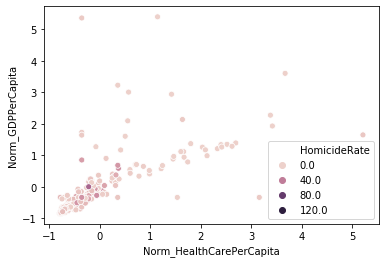

In [11]:
sns.set(style="ticks")
sns.scatterplot(primary['Norm_HealthCarePerCapita'], primary['Norm_GDPPerCapita'], hue=primary['HomicideRate'])

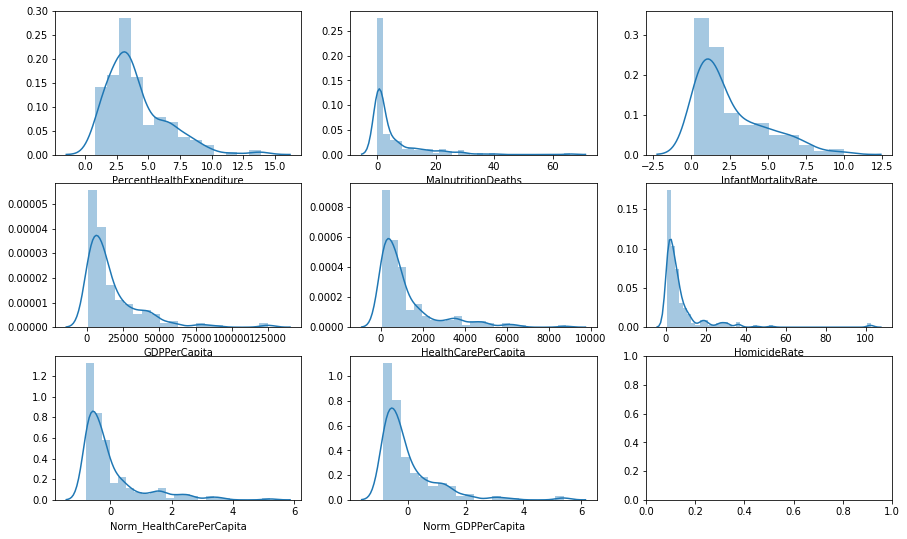

In [52]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15,9))
for i, column in enumerate(primary.columns[4:]):
    sns.distplot(primary[column],ax=axes[i//3,i%3])

In [ ]:
sns.set(style="ticks")
sns.pairplot(primary.iloc[:,3:], hue='HomicideRate')

KeyboardInterrupt: 

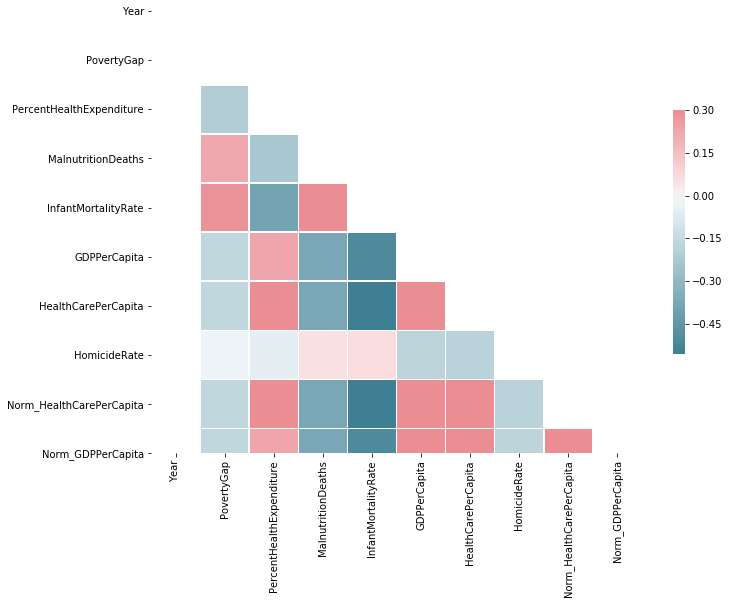

In [28]:
corr = primary.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [29]:
corr['HomicideRate']

Year                             NaN
PovertyGap                 -0.029908
PercentHealthExpenditure   -0.048118
MalnutritionDeaths          0.047326
InfantMortalityRate         0.059758
GDPPerCapita               -0.174352
HealthCarePerCapita        -0.179712
HomicideRate                1.000000
Norm_HealthCarePerCapita   -0.179712
Norm_GDPPerCapita          -0.174352
Name: HomicideRate, dtype: float64

In [30]:
# women['Year'] = women['Year'].apply(lambda x: int(float(x)))
# women = women[women['Year'] == 2012]

In [31]:
# women_primary = pd.concat([primary, women], axis=1, keys='Code')
# women_primary.columns = women_primary.columns.get_level_values(0)
# women_primary.dropna()

In [32]:
# sns.barplot(women_primary['MOBILITY'], women_primary['HomicideRate'])
# women

In [33]:
# primary['Year'] = primary['Year'].apply(lambda x: int(x))